In [41]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [42]:
heart_attack = pd.read_csv("heart_attack_analysis_prediction_dataset.csv")

In [43]:
df = heart_attack.copy()

In [44]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.shape

(303, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [47]:
y = df['output']
x = df.drop("output", axis=1)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 15, train_size = 0.80)

In [49]:
dt = DecisionTreeClassifier()
model = dt.fit(x, y)
model.score(x, y)

1.0

In [50]:
dt = DecisionTreeClassifier()
model = dt.fit(x_train, y_train)
model.score(x_test, y_test)

0.8032786885245902

In [51]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
model.predict([[37, 1, 2, 130, 250, 0, 1, 187, 0, 3.5, 0, 0, 2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [53]:
dot = export_graphviz(model, feature_names = x.columns, filled = True)
visual = graphviz.Source(dot)

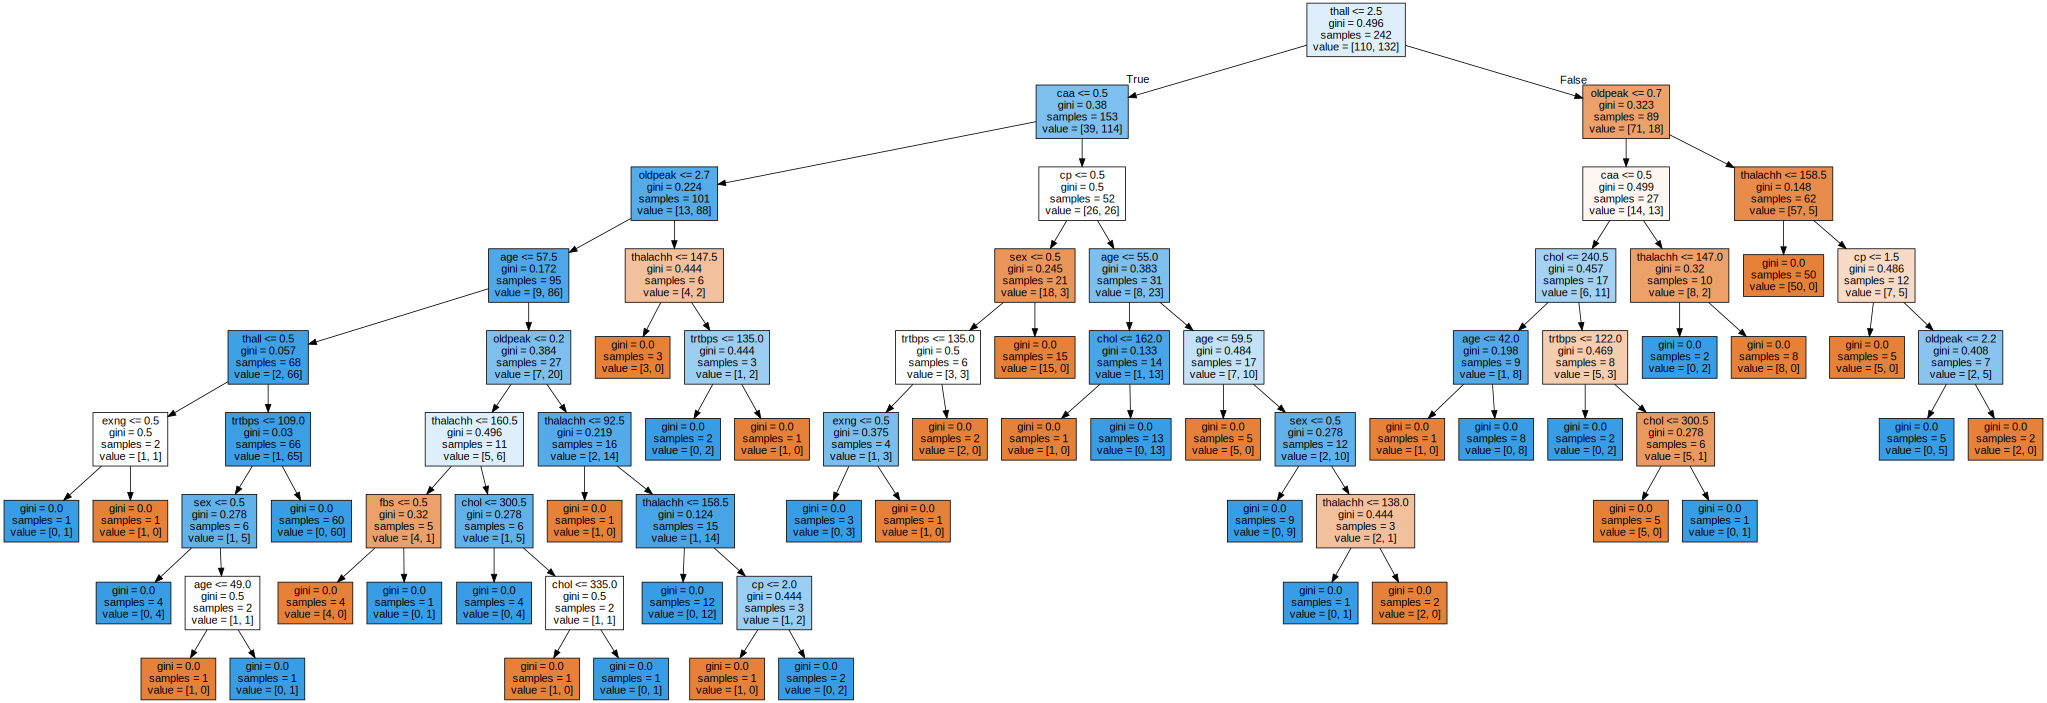

In [54]:
visual

In [55]:
rf = RandomForestClassifier(n_estimators = 200)
model = rf.fit(x_train, y_train)
model.score(x_test, y_test)

0.8360655737704918

In [56]:
xgbc = xgb.XGBClassifier()
model = xgbc.fit(x_train,y_train)
model.score(x_test,y_test)

0.819672131147541

In [57]:
df.sample()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1


In [58]:
df.sample().drop("output", axis = 1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2


In [59]:
random_human_values = df.sample().drop("output", axis = 1).values

In [60]:
model.predict(random_human_values)

array([0])